In [1]:
import pandas as pd
data1=pd.read_excel('Desktop/McGill/LDI/Gabi/GPT_MODEL/TESTING/testALL.xlsx', sheet_name='CHAT=1')
data2=pd.read_excel('Desktop/McGill/LDI/Gabi/GPT_MODEL/TESTING/trainALL.xlsx', sheet_name='CHAT=1')
#print(data1.head())
print(data1.info())
#print(data2.head())
print(data2.info())
data3=pd.concat([data1,data2],axis=0, join='outer', ignore_index=True)
#print(data3.head())
print(data3.info())
for a,b,c in zip(data1.columns,data2.columns,data3.columns):
    print(f'{a}|{b}|{c}')
print(len(data1.columns))
print(len(data2.columns))
print(len(data3.columns))
for i in data3:
    print(i)
    if i in data2 and i in data1:
        print(f'{data3[i].count()}={int(data2[i].count())+int(data1[i].count())}')
    elif i in data2:
        print(f'DATA2ONLY{data3[i].count()}={int(data2[i].count())}')
    elif i in data1:
        print(f'DATA1ONLY{data3[i].count()}={int(data1[i].count())}')
    else:
        print(f'IMPOSSIBLE{data3[i].count()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CLASS                                 50 non-null     int64  
 1   Clarity                               18 non-null     float64
 2   Comma misuse within clauses           15 non-null     float64
 3   Confused words                        4 non-null      float64
 4   Conjunction use                       2 non-null      float64
 5   Correctness                           47 non-null     float64
 6   Critical                              50 non-null     int64  
 7   Determiner use (a/an/the/this, etc.)  35 non-null     float64
 8   Faulty subject-verb agreement         6 non-null      float64
 9   Improper formatting                   3 non-null      float64
 10  Incorrect noun number                 13 non-null     float64
 11  Incorrect verb forms 

In [2]:
print(data3.isna().sum())
data3.fillna(0, inplace=True)
print(data3.isna().sum())
data3.head(5)

CLASS                                     0
Clarity                                 110
Comma misuse within clauses             121
Confused words                          127
Conjunction use                         145
Correctness                              17
Critical                                  0
Determiner use (a/an/the/this, etc.)     53
Faulty subject-verb agreement           131
Improper formatting                     147
Incorrect noun number                   108
Incorrect verb forms                    145
Issues left                               0
Misspelled words                        105
Misuse of modiers                       147
Mixed dialects of english               127
Rare Words                                0
Score                                     0
Sentence Length                           0
Unique Words                              0
Unknown words                           137
Word Length                               0
Wordy sentences                 

,CLASS,Clarity,Comma misuse within clauses,Confused words,Conjunction use,Correctness,Critical,"Determiner use (a/an/the/this, etc.)",Faulty subject-verb agreement,Improper formatting,...,Unique Words,Unknown words,Word Length,Wordy sentences,Wrong or missing prepositions,characters,sentences,words,Misuse of semicolons,Punctuation in compound
0,0,2.0,2.0,0.0,0.0,7.0,7,3.0,0.0,1.0,...,44,0.0,5.2,2.0,1.0,2015,15,298,0.0,0.0
1,0,0.0,3.0,0.0,0.0,5.0,5,1.0,0.0,0.0,...,43,0.0,4.6,0.0,0.0,1614,14,253,0.0,0.0
2,0,1.0,1.0,0.0,0.0,5.0,5,1.0,0.0,3.0,...,42,0.0,4.9,1.0,0.0,2178,14,339,0.0,0.0
3,0,2.0,2.0,0.0,0.0,7.0,7,3.0,0.0,1.0,...,44,0.0,5.2,2.0,1.0,2015,15,298,0.0,0.0
4,0,0.0,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0,...,47,0.0,4.9,0.0,0.0,1435,10,215,0.0,0.0


In [3]:
data4=data3.sample(frac=1).reset_index(drop=True)
data4
from sklearn.model_selection import train_test_split
X=data4.drop('CLASS',axis=1)
y=data4['CLASS']
X
y

0      0
1      1
2      0
3      0
4      1
      ..
145    1
146    1
147    0
148    0
149    1
Name: CLASS, Length: 150, dtype: int64

In [4]:
X

,Clarity,Comma misuse within clauses,Confused words,Conjunction use,Correctness,Critical,"Determiner use (a/an/the/this, etc.)",Faulty subject-verb agreement,Improper formatting,Incorrect noun number,...,Unique Words,Unknown words,Word Length,Wordy sentences,Wrong or missing prepositions,characters,sentences,words,Misuse of semicolons,Punctuation in compound
0,0.0,0.0,0.0,0.0,4.0,4,2.0,1.0,0.0,0.0,...,41,0.0,5.7,0.0,1.0,2431,14,333,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,38,0.0,5.9,0.0,0.0,2342,14,326,0.0,0.0
2,0.0,1.0,0.0,0.0,2.0,2,0.0,0.0,0.0,0.0,...,39,0.0,6.4,0.0,0.0,2232,15,291,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,...,41,0.0,6.3,0.0,0.0,3260,19,425,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0,0.0,...,36,0.0,6.1,0.0,0.0,2167,14,295,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,...,42,0.0,5.8,0.0,0.0,1867,13,258,0.0,0.0
146,0.0,1.0,0.0,0.0,7.0,7,3.0,0.0,0.0,3.0,...,42,0.0,5.7,0.0,0.0,1235,8,180,0.0,0.0
147,1.0,1.0,0.0,0.0,5.0,5,1.0,0.0,3.0,0.0,...,42,0.0,4.9,1.0,0.0,2178,14,339,0.0,0.0
148,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,41,0.0,5.2,0.0,0.0,2739,15,395,0.0,0.0


In [5]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.2,random_state=42)
X_tr

,Clarity,Comma misuse within clauses,Confused words,Conjunction use,Correctness,Critical,"Determiner use (a/an/the/this, etc.)",Faulty subject-verb agreement,Improper formatting,Incorrect noun number,...,Unique Words,Unknown words,Word Length,Wordy sentences,Wrong or missing prepositions,characters,sentences,words,Misuse of semicolons,Punctuation in compound
22,0.0,0.0,4.0,0.0,6.0,6,2.0,0.0,0.0,0.0,...,32,0.0,5.3,0.0,0.0,2999,18,438,0.0,0.0
15,0.0,0.0,0.0,1.0,8.0,8,3.0,0.0,0.0,0.0,...,48,0.0,5.2,0.0,0.0,2144,14,320,0.0,0.0
65,0.0,0.0,0.0,0.0,7.0,7,1.0,0.0,0.0,0.0,...,42,0.0,5.2,0.0,0.0,1793,12,273,0.0,0.0
11,0.0,1.0,1.0,0.0,8.0,8,2.0,0.0,0.0,1.0,...,38,0.0,5.8,0.0,0.0,3000,14,418,0.0,0.0
42,0.0,0.0,0.0,0.0,5.0,5,4.0,0.0,0.0,1.0,...,39,0.0,5.9,0.0,0.0,2373,15,323,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.0,0.0,0.0,5.0,5,3.0,0.0,0.0,0.0,...,45,0.0,5.4,0.0,1.0,1937,12,289,0.0,0.0
106,0.0,0.0,0.0,0.0,2.0,2,1.0,1.0,0.0,0.0,...,44,0.0,5.8,0.0,0.0,1947,12,271,0.0,0.0
14,0.0,0.0,0.0,0.0,6.0,6,1.0,0.0,0.0,1.0,...,44,0.0,6.4,0.0,0.0,1575,11,210,0.0,0.0
92,0.0,0.0,0.0,0.0,5.0,5,1.0,0.0,0.0,1.0,...,49,0.0,4.9,0.0,0.0,1373,11,213,0.0,0.0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_tr_sc=scaler.fit_transform(X_tr)
X_te_sc=scaler.fit_transform(X_te)
X_tr_sc

array([[-0.59169187, -0.38778337,  4.62251676, ...,  1.50646344,
        -0.09166985, -0.09166985],
       [-0.59169187, -0.38778337, -0.34125963, ...,  0.12372394,
        -0.09166985, -0.09166985],
       [-0.59169187, -0.38778337, -0.34125963, ..., -0.42702824,
        -0.09166985, -0.09166985],
       ...,
       [-0.59169187, -0.38778337, -0.34125963, ..., -1.16527052,
        -0.09166985, -0.09166985],
       [-0.59169187, -0.38778337, -0.34125963, ..., -1.13011612,
        -0.09166985, -0.09166985],
       [-0.59169187, -0.38778337, -0.34125963, ...,  0.58073106,
        -0.09166985, -0.09166985]])

In [7]:
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
history = model.fit(X_tr_sc, y_tr, epochs=20)

2023-04-05 14:49:25.385793: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
4/4 [==============================] - 1s 6ms/step - loss: 0.6259 - accuracy: 0.5750 - precision: 0.6429 - recall: 0.3051
Epoch 2/20
4/4 [==============================] - 0s 6ms/step - loss: 0.4140 - accuracy: 0.8750 - precision: 0.8793 - recall: 0.8644
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3024 - accuracy: 0.8833 - precision: 0.8462 - recall: 0.9322
Epoch 4/20
4/4 [==============================] - 0s 7ms/step - loss: 0.2249 - accuracy: 0.9000 - precision: 0.8615 - recall: 0.9492
Epoch 5/20
4/4 [==============================] - 0s 9ms/step - loss: 0.1711 - accuracy: 0.9250 - precision: 0.9167 - recall: 0.9322
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1364 - accuracy: 0.9500 - precision: 0.9492 - recall: 0.9492
Epoch 7/20
4/4 [==============================] - 0s 6ms/step - loss: 0.1069 - accuracy: 0.9667 - precision: 0.9508 - recall: 0.9831
Epoch 8/20
4/4 [==============================] - 0s 7ms/step - loss:

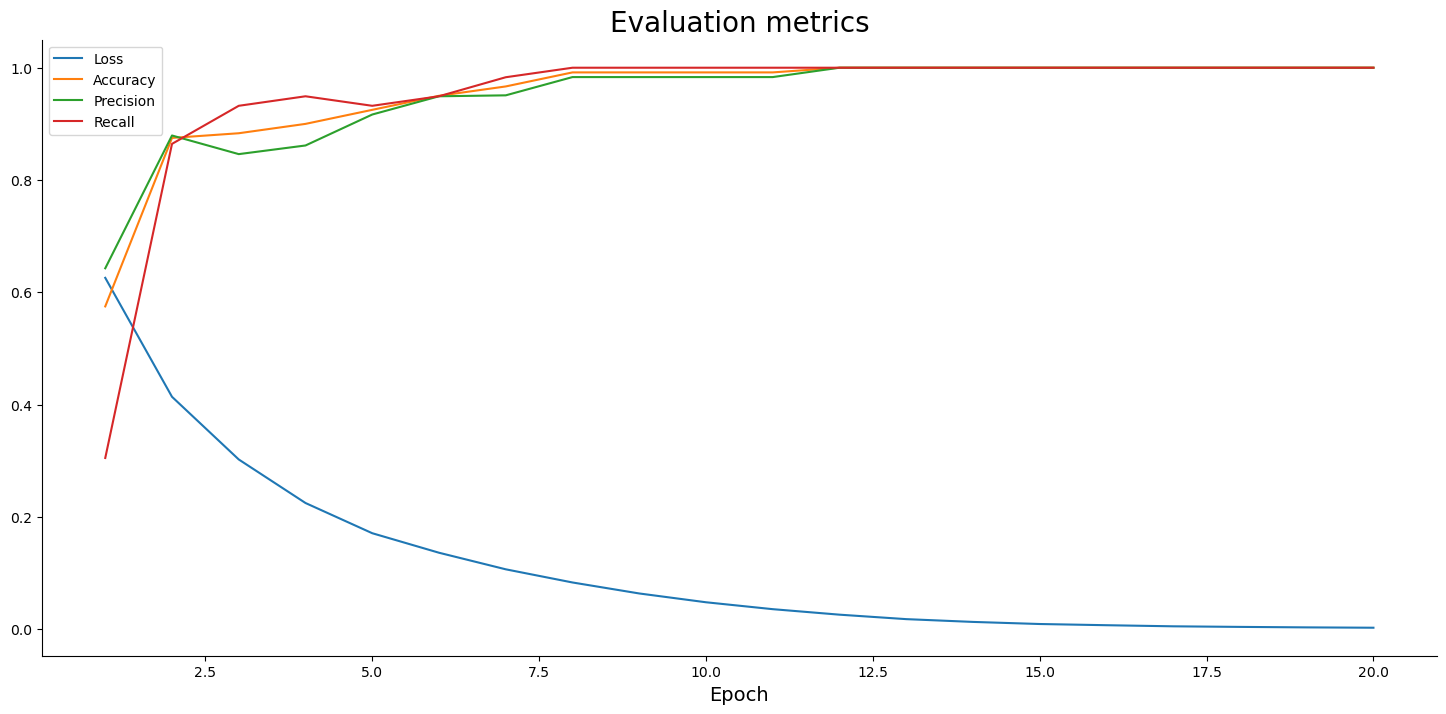

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
def EvMets(leg):
    plt.plot(np.arange(1, 21), leg.history['loss'], label='Loss')
    plt.plot(np.arange(1, 21), leg.history['accuracy'], label='Accuracy')
    plt.plot(np.arange(1, 21), leg.history['precision'], label='Precision')
    plt.plot(np.arange(1, 21), leg.history['recall'], label='Recall')
    plt.title('Evaluation metrics', size=20)
    plt.xlabel('Epoch', size=14)
    plt.legend();
EvMets(history)

In [9]:
preds=model.predict(X_te_sc)
preds

1/1 [==============================] - 0s 69ms/step


array([[9.9999958e-01],
       [1.0494344e-09],
       [2.2634605e-03],
       [2.8779075e-01],
       [5.0518306e-08],
       [9.9998832e-01],
       [9.9998474e-01],
       [9.9967980e-01],
       [3.2175383e-01],
       [1.5022265e-07],
       [9.9926591e-01],
       [2.0336500e-07],
       [9.6845448e-01],
       [9.9954563e-01],
       [9.9992853e-01],
       [1.3580982e-08],
       [9.9965042e-01],
       [9.9907404e-01],
       [9.9082643e-01],
       [6.2457839e-06],
       [9.9333376e-01],
       [4.5448178e-06],
       [9.9995226e-01],
       [3.1483292e-18],
       [1.0511386e-04],
       [9.9913818e-01],
       [1.0435634e-04],
       [1.9495748e-02],
       [6.8397562e-06],
       [9.9992073e-01]], dtype=float32)

ROC_AUC Score :  0.9464285714285714
Function for ROC_AUC Score :  0.9464285714285714
Threshold value is: 0.28779075


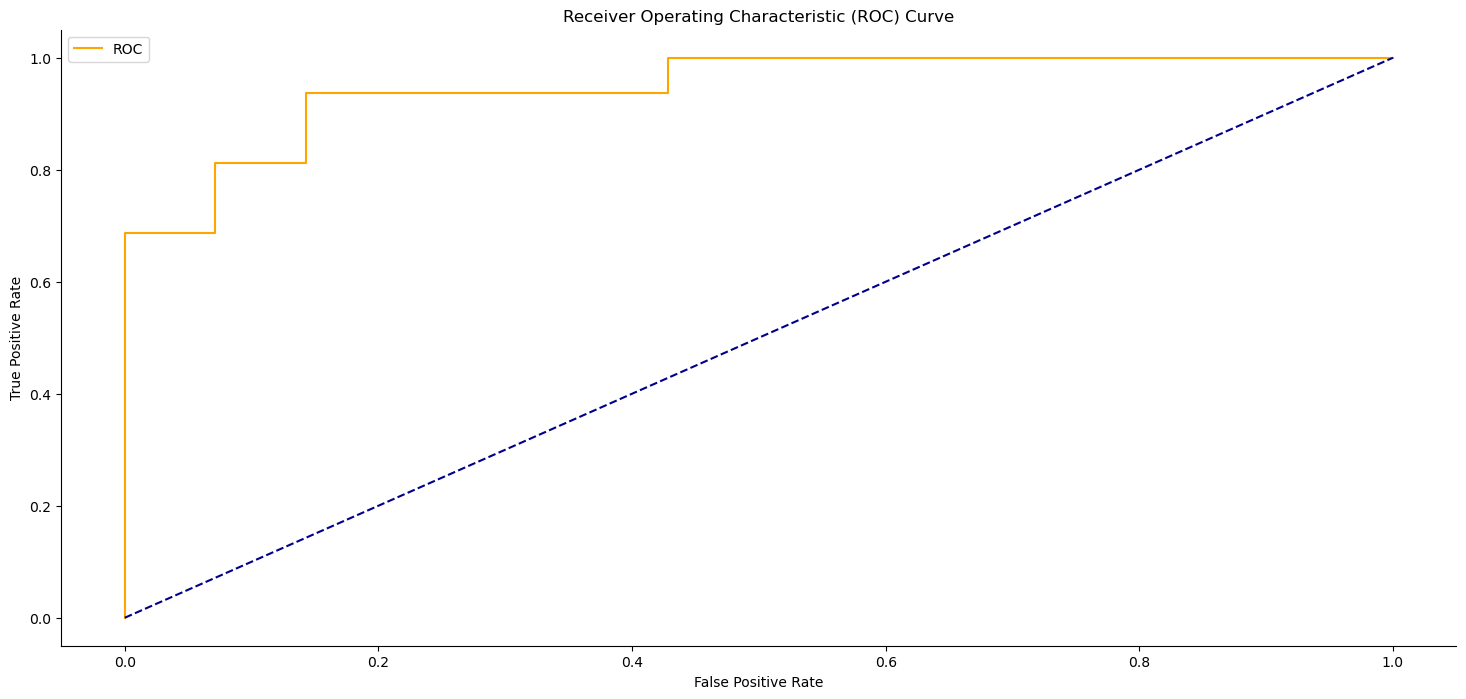

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
# Computing manually fpr, tpr, thresholds and roc auc 
fpr, tpr, thresholds = roc_curve(y_te, preds)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
print("Function for ROC_AUC Score : ",roc_auc_score(y_te, preds)) # Function present
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [11]:
prediction_classes = [1 if prob > optimal_threshold else 0 for prob in np.ravel(preds)]
prediction_classes[:20]

[1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0]

In [12]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_te, prediction_classes))

[[12  2]
 [ 2 14]]


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy: {accuracy_score(y_te, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_te, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_te, prediction_classes):.2f}')

Accuracy: 0.87
Precision: 0.88
Recall: 0.88


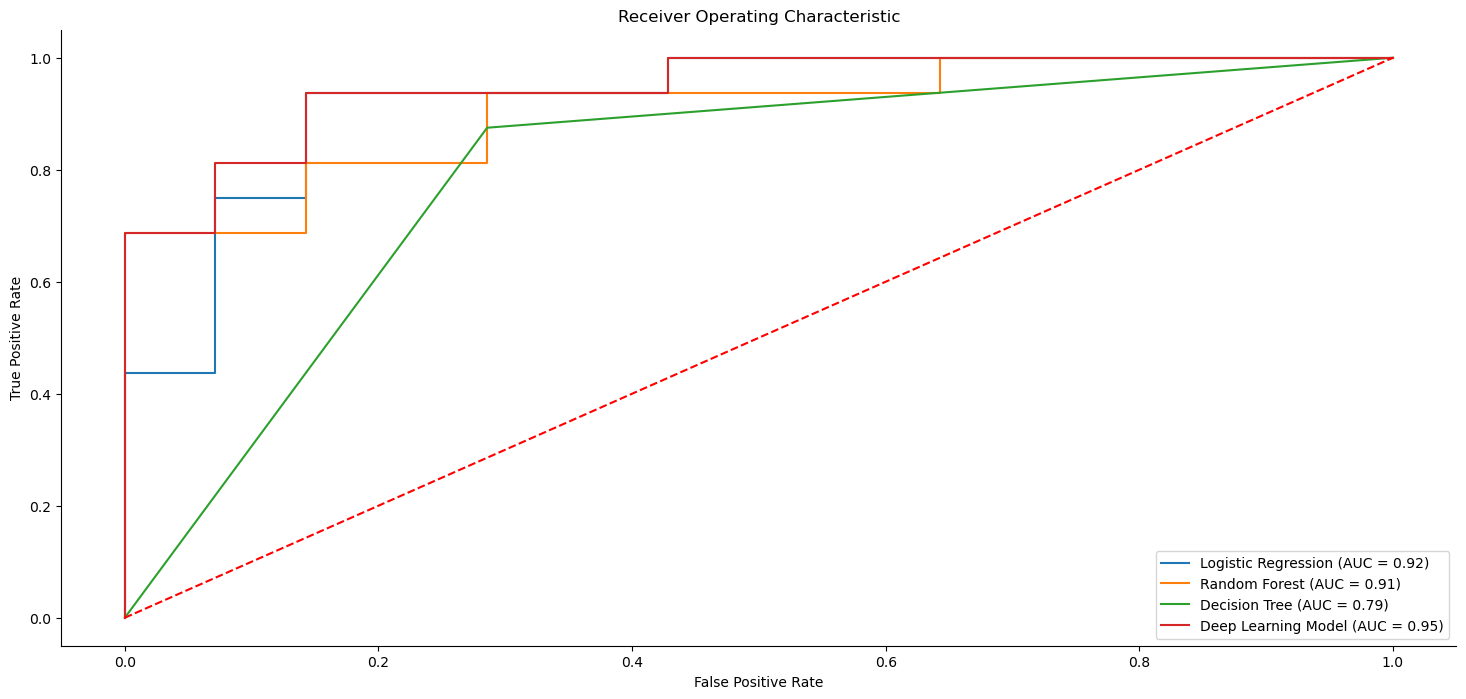

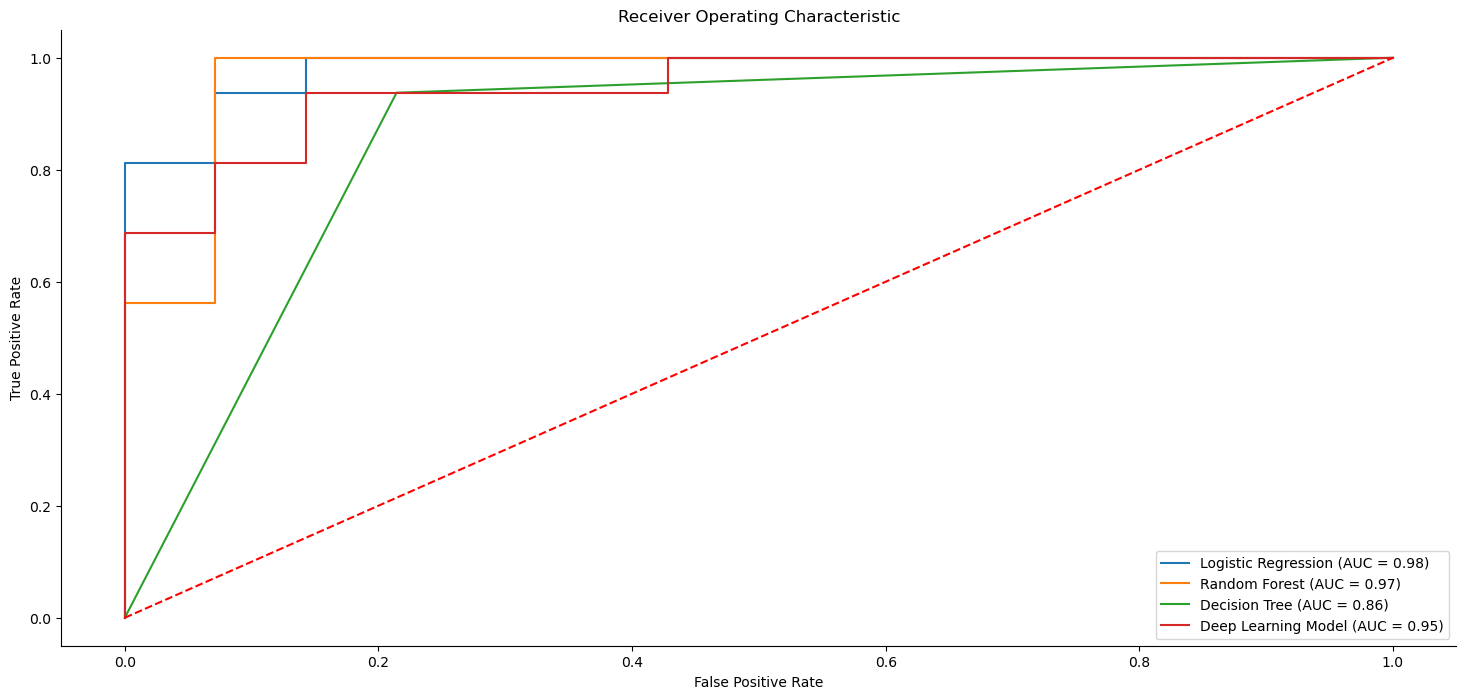

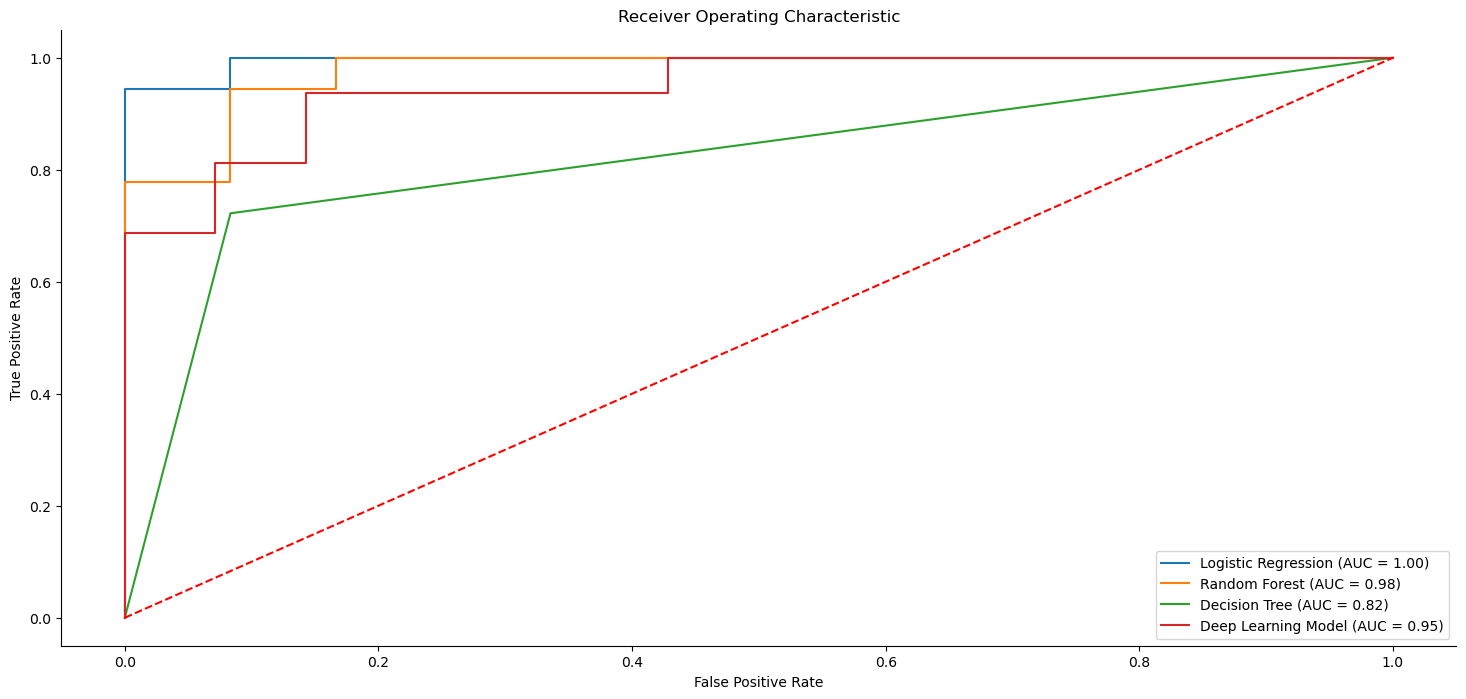

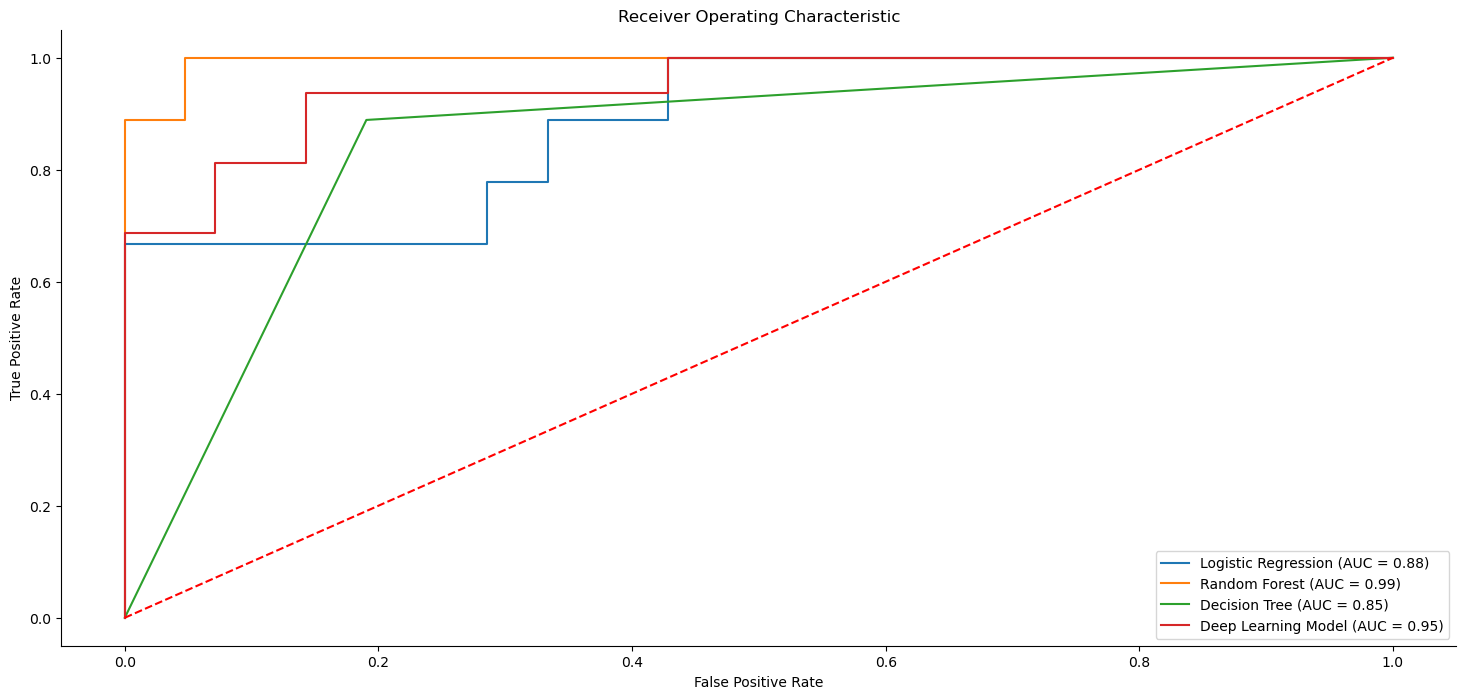

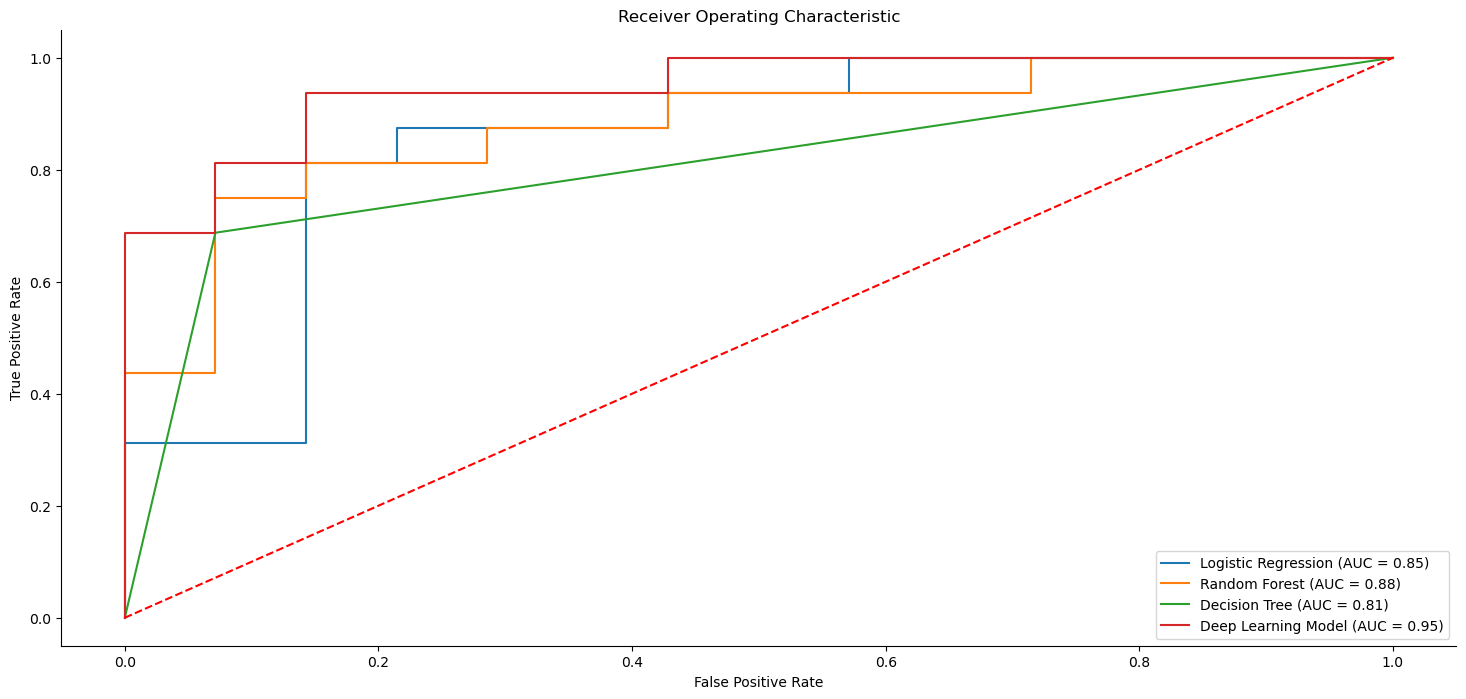

LR
Accuracy: 0.8466666666666667 [0.8333333333333334, 0.9333333333333333, 0.9666666666666667, 0.7, 0.8]
Precision: 0.8233333333333335 [0.8666666666666667, 0.9375, 1.0, 0.5, 0.8125]
Recall: 0.8569444444444445 [0.8125, 0.9375, 0.9444444444444444, 0.7777777777777778, 0.8125]
DT
Accuracy: 0.8200000000000001 [0.8, 0.8666666666666667, 0.8, 0.8333333333333334, 0.8]
Precision: 0.8246031746031746 [0.7777777777777778, 0.8333333333333334, 0.9285714285714286, 0.6666666666666666, 0.9166666666666666]
Recall: 0.8222222222222222 [0.875, 0.9375, 0.7222222222222222, 0.8888888888888888, 0.6875]
RF
Accuracy: 0.8333333333333334 [0.7666666666666667, 0.9, 0.9, 0.7666666666666667, 0.8333333333333334]
Precision: 0.8249585218702865 [0.7647058823529411, 0.9333333333333333, 0.9411764705882353, 0.5625, 0.9230769230769231]
Recall: 0.8652777777777778 [0.8125, 0.875, 0.8888888888888888, 1.0, 0.75]


'\n    #model.compile(\n    #loss=tf.keras.losses.binary_crossentropy,\n    #optimizer=tf.keras.optimizers.Adam(lr=0.03),\n    #metrics=[\n    #    tf.keras.metrics.BinaryAccuracy(name=\'accuracy\'),\n    #    tf.keras.metrics.Precision(name=\'precision\'),\n    #    tf.keras.metrics.Recall(name=\'recall\')\n    #])\n    #history=model.fit(X_tr_sc1,y_train,epochs=20)\n    #histories.append(history)\n    #predictions = model.predict(X_te_sc1)\n\n    fpr, tpr, thresholds = roc_curve(y_test, predictions)\n    roc_auc = auc(fpr, tpr)\n    print("ROC_AUC Score : ",roc_auc)\n    print("Function for ROC_AUC Score : ",roc_auc_score(y_test, predictions)) # Function present\n    optimal_idx = np.argmax(tpr - fpr)\n    optimal_threshold = thresholds[optimal_idx]\n    print("Threshold value is:", optimal_threshold)\n    plot_roc_curve(fpr, tpr)\n    prediction_classes = [\n    1 if prob > optimal_threshold else 0 for prob in np.ravel(predictions)]\n    print(prediction_classes[:20])\n    print(con

In [14]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Split data into 5 folds for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
acc1=[]
pre1=[]
rec1=[]
acc2=[]
pre2=[]
rec2=[]
acc3=[]
pre3=[]
rec3=[]
# Perform cross-validation on each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #my model#
    X_tr_sc1=scaler.fit_transform(X_train)
    X_te_sc1=scaler.fit_transform(X_test)
    model1 = LogisticRegression()
    model1.fit(X_tr_sc1, y_train)
    model2 = DecisionTreeClassifier(max_depth=10, random_state=42)
    model2.fit(X_tr_sc1, y_train)
    model3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    model3.fit(X_tr_sc1, y_train)
    # make predictions on the testing set
    y_pred1 = model1.predict(X_te_sc1)
    y_pred2 = model2.predict(X_te_sc1)
    y_pred3 = model3.predict(X_te_sc1)
    
    logreg_y_pred_prob = model1.predict_proba(X_te_sc1)[:,1]
    rf_y_pred_prob = model3.predict_proba(X_te_sc1)[:,1]
    dt_y_pred_prob = model2.predict_proba(X_te_sc1)[:,1]
    
    # calculate ROC curve and AUC for logistic regression model
    fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg_y_pred_prob)
    roc_auc_logreg = roc_auc_score(y_test, logreg_y_pred_prob)

    # calculate ROC curve and AUC for random forest model
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_y_pred_prob)
    roc_auc_rf = roc_auc_score(y_test, rf_y_pred_prob)

    # calculate ROC curve and AUC for decision tree model
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_y_pred_prob)
    roc_auc_dt = roc_auc_score(y_test, dt_y_pred_prob)
    
    # plot ROC curves for all three models
    plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
    plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
    plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
    plt.plot(fpr,tpr,label='Deep Learning Model (AUC = %0.2f)'%roc_auc)

    # plot the random chance line
    plt.plot([0, 1], [0, 1],'r--')

    # set plot title and axis labels
    plt.title('Receiver Operating Characteristic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # show the legend and display the plot
    plt.legend(loc='lower right')
    plt.show()
    # evaluate the model's performance
    acc1.append(accuracy_score(y_test, y_pred1))
    
    
    pre1.append(precision_score(y_test, y_pred1))
    rec1.append(recall_score(y_test, y_pred1))
    acc2.append(accuracy_score(y_test, y_pred2))
    
    
    pre2.append(precision_score(y_test, y_pred2))
    rec2.append(recall_score(y_test, y_pred2))
    acc3.append(accuracy_score(y_test, y_pred3))
    
    
    pre3.append(precision_score(y_test, y_pred3))
    rec3.append(recall_score(y_test, y_pred3))
print('LR')
print('Accuracy:',np.mean(acc1),acc1)
print('Precision:',np.mean(pre1),pre1)
print('Recall:',np.mean(rec1),rec1)
print('DT')
print('Accuracy:',np.mean(acc2),acc2)
print('Precision:',np.mean(pre2),pre2)
print('Recall:',np.mean(rec2),rec2)
print('RF')
print('Accuracy:',np.mean(acc3),acc3)
print('Precision:',np.mean(pre3),pre3)
print('Recall:',np.mean(rec3),rec3)